# Tamas Flesch Thesis - Decision Tree step

## LMJU - UpGrad - DS

### Fifa 23 Ultimate Team player price prediction based on the player's attributes

<span style="color:red">*UPDATE*</span>

The document was updated with the latest EA FC 24 dataset to be able to compare the results with the previous FIFA 23 dataset.

Table of contents
- Imports
- Read data
- Inspect the data
- Build decision tree model
- Using a random forest
- Grid Search experiment
- Data segmentation

#### Imports

In [216]:
# Importing the required libraries
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Read data

In [214]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('futbin24.csv')

#### Inspecting the data

In [215]:
df.head()

,Name,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,...,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
0,Erling Haaland,97,1980000.0,4,5,96.0,98,80,91,56,...,0,0,0,0,0,0,0,0,1,1
1,Kylian Mbappé,97,6250000.0,5,4,99.0,96,88,97,47,...,0,0,0,0,0,0,0,0,1,1
2,Lionel Messi,97,2830000.0,5,4,91.0,96,97,98,40,...,0,0,0,0,0,0,0,1,0,1
3,Pelé,97,6400000.0,5,5,95.0,96,92,96,60,...,0,0,0,0,0,0,0,0,1,1
4,Johan Cruyff,97,3550000.0,5,5,93.0,95,93,97,50,...,0,0,0,0,0,0,0,0,1,1


In [5]:
df_names = df.pop('Name')

In [6]:
df.head()

,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,...,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
0,97,1980000.0,4,5,96.0,98,80,91,56,97,...,0,0,0,0,0,0,0,0,1,1
1,97,6250000.0,5,4,99.0,96,88,97,47,88,...,0,0,0,0,0,0,0,0,1,1
2,97,2830000.0,5,4,91.0,96,97,98,40,77,...,0,0,0,0,0,0,0,1,0,1
3,97,6400000.0,5,5,95.0,96,92,96,60,81,...,0,0,0,0,0,0,0,0,1,1
4,97,3550000.0,5,5,93.0,95,93,97,50,80,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df_names.head()

0    Erling Haaland
1     Kylian Mbappé
2      Lionel Messi
3              Pelé
4      Johan Cruyff
Name: Name, dtype: object

#### Build a decision tree model

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [12]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

In [13]:
df_train.shape, df_test.shape

((7197, 114), (1800, 114))

In [14]:
df_test.head()

,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,...,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
8882,68,200.0,3,2,60.0,55,62,65,62,72,...,0,0,0,0,0,0,0,0,1,0
4261,69,200.0,2,3,66.0,29,43,52,70,71,...,0,0,0,0,0,0,0,0,1,1
3943,70,250.0,1,3,70.0,71,67,72,49,68,...,0,0,0,0,0,0,0,0,1,1
5395,65,200.0,3,3,67.0,58,64,68,59,65,...,0,0,0,0,0,0,0,0,1,1
2675,76,2000.0,3,3,74.0,64,72,75,75,68,...,0,0,0,0,0,0,0,0,1,1


In [17]:
scaler = MinMaxScaler()

In [18]:
df_train['Price'] = scaler.fit_transform(df_train[['Price']])
df_test['Price'] = scaler.transform(df_test[['Price']])

In [19]:
df_train.Price.describe()

count    7197.000000
mean        0.005263
std         0.034108
min         0.000000
25%         0.000000
50%         0.000024
75%         0.000439
max         1.000000
Name: Price, dtype: float64

In [20]:
y_train = df_train.pop("Price")
X_train = df_train

y_test = df_test.pop("Price")
X_test = df_test

In [21]:
X_test.shape, X_train.shape

((1800, 113), (7197, 113))

#### Fit the DT model

In [22]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

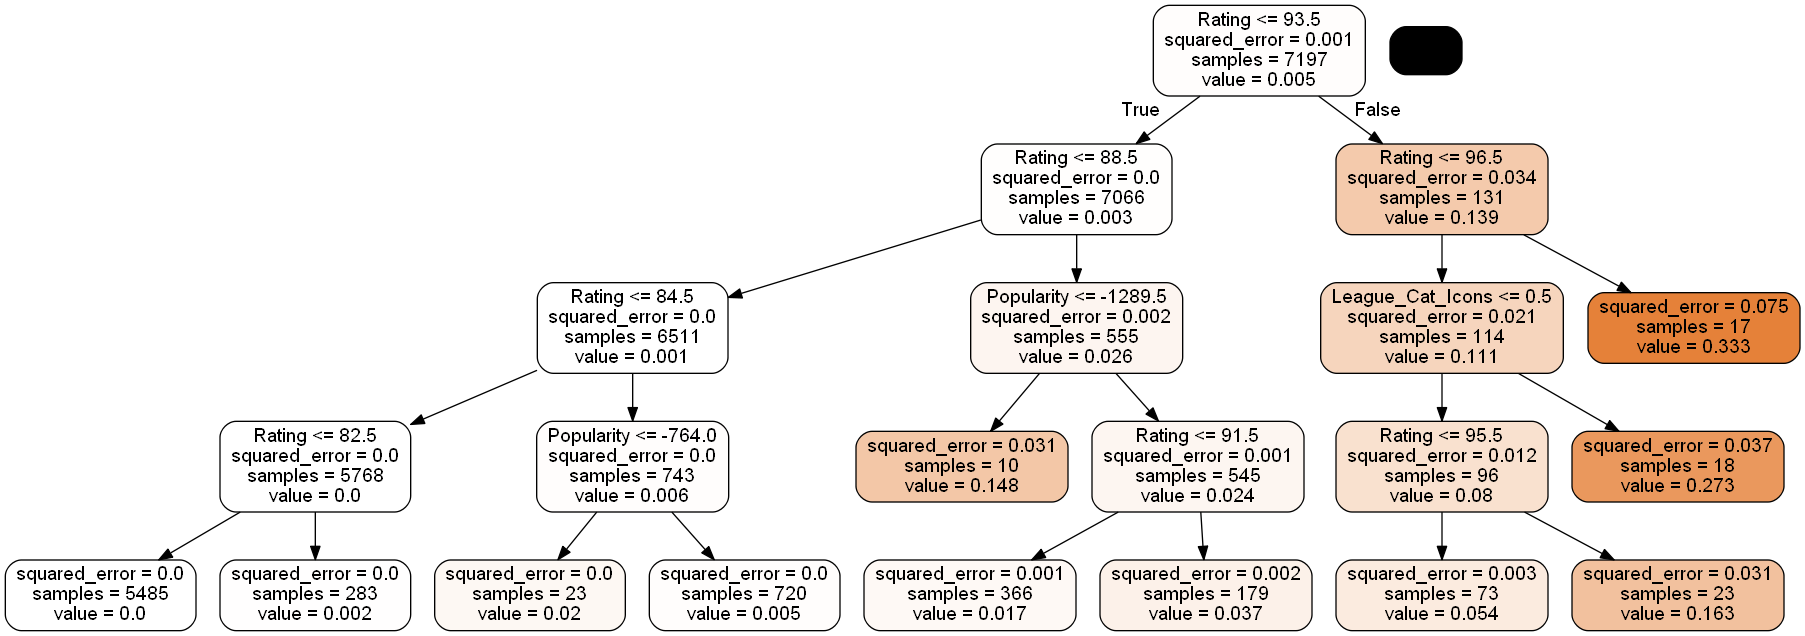

In [23]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [24]:
y_train_pred = dt.predict(X_train)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_train, y_train_pred)

0.5313996656284282

In [27]:
y_test_pred = dt.predict(X_test)

In [28]:
r2_score(y_test, y_test_pred)

0.18574512614521954

#### Using Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [32]:
sample_tree = rf.estimators_[20]

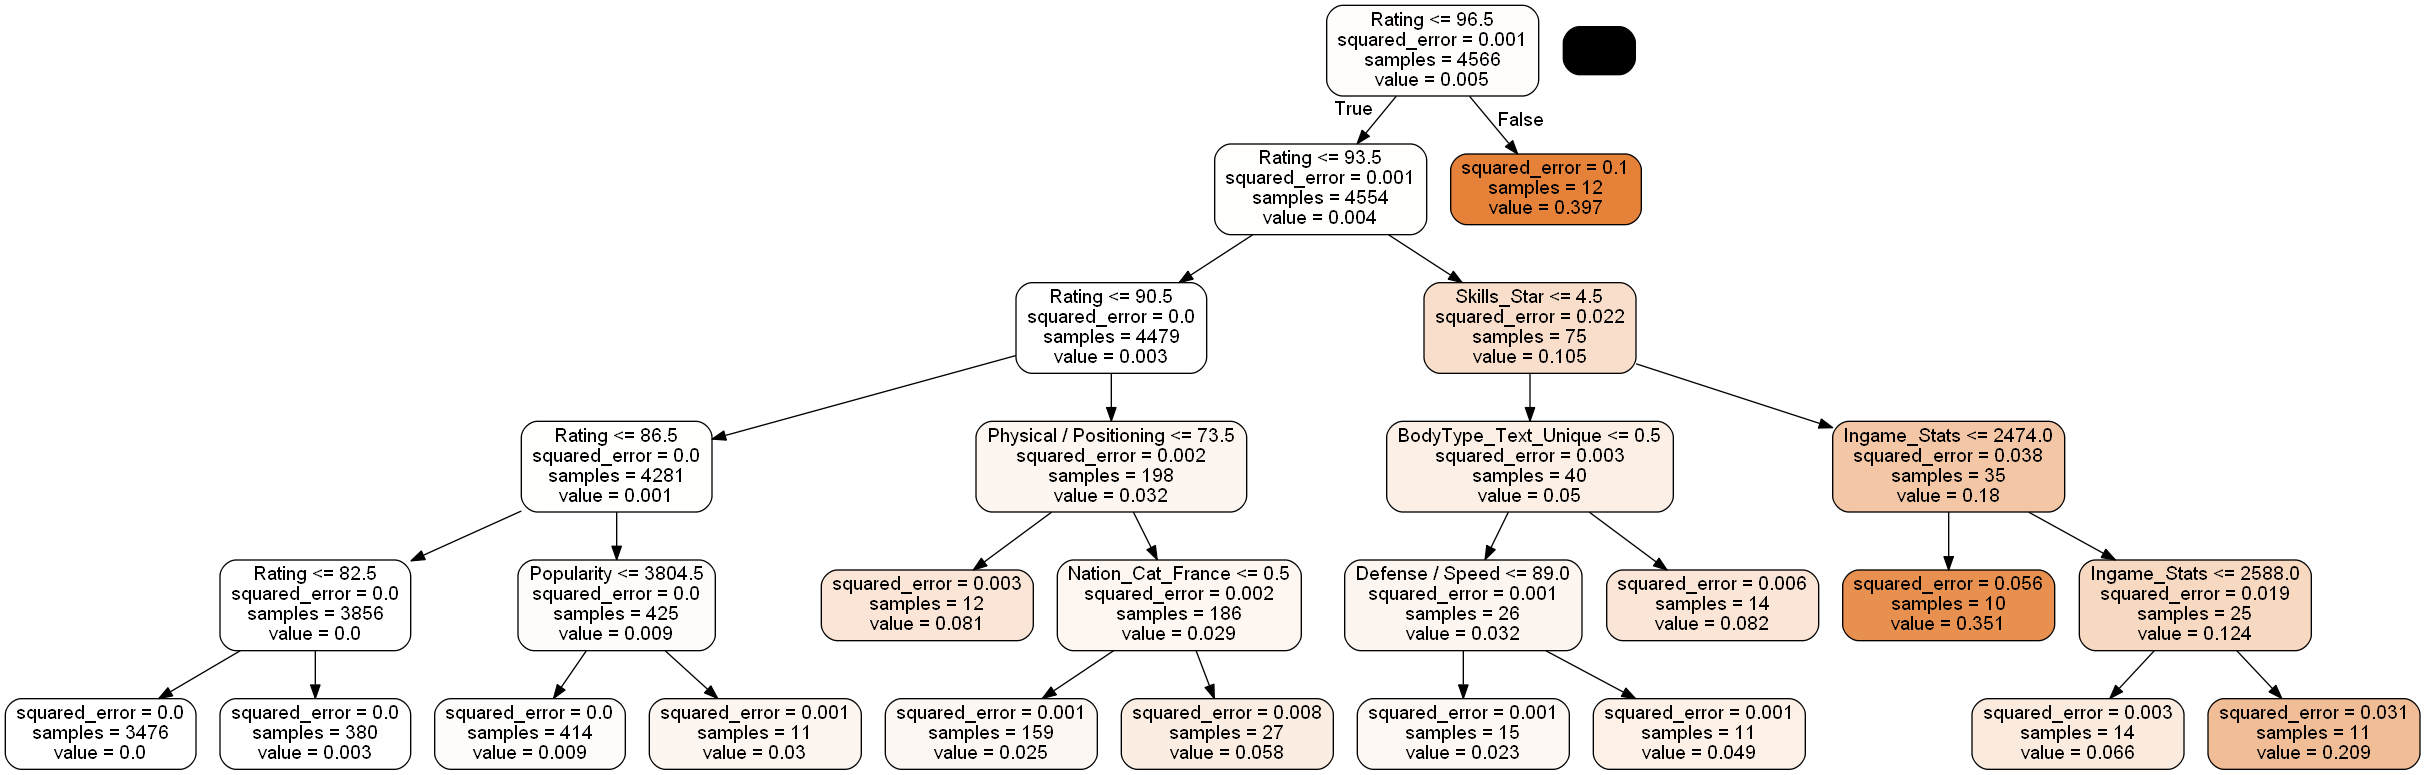

In [33]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [34]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [35]:
r2_score(y_train, y_train_pred)

0.6279347457920115

In [36]:
r2_score(y_test, y_test_pred)

0.5514145753084883

In [37]:
rf.feature_importances_

array([6.92268737e-01, 2.60252252e-02, 9.82527927e-04, 9.09278555e-03,
       6.01682732e-03, 2.72161397e-03, 2.37181627e-02, 4.50960747e-02,
       5.77936865e-03, 2.60875111e-02, 1.56992024e-02, 1.08754636e-02,
       1.34013145e-02, 8.02184333e-03, 3.66642640e-02, 1.74275208e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.39884546e-06, 3.70603536e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.46740802e-05, 5.96202657e-03, 8.81476437e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.79042198e-04,
       0.00000000e+00, 2.04698175e-05, 0.00000000e+00, 0.00000000e+00,
      

In [38]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [39]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Rating,0.692269
57,League_Cat_Icons,0.050532
7,Defense / Speed,0.045096
14,Club_Hero,0.036664
9,Popularity,0.026088
...,...,...
55,BodyType_Text_Tall & Stocky,0.000000
54,BodyType_Text_Tall & Normal,0.000000
52,BodyType_Text_Short & Stocky,0.000000
50,BodyType_Text_Short & Lean,0.000000


#### Grid search for hyper-parameter tuning

In [40]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
classifier_rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [42]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 8, 10, 13, 15, 17, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [43]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=1, scoring = "r2", error_score="raise")

In [44]:
X_train.head()

,Rating,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Popularity,...,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
7877,88,4,4,85.0,88,72,89,34,84,99,...,0,0,0,0,0,0,0,0,1,0
8382,78,3,3,78.0,58,72,76,74,78,5,...,0,0,0,0,0,0,0,0,1,0
49,95,5,4,95.0,90,90,99,81,80,481,...,0,0,0,0,0,0,0,0,1,1
6461,61,2,2,57.0,24,40,42,63,62,-1,...,0,0,0,0,0,0,0,0,1,1
2474,77,3,3,70.0,80,69,75,45,68,5,...,0,0,0,0,0,0,0,0,1,1


In [45]:
y_train.head()

7877    0.003421
8382    0.000061
49      0.039855
6461    0.000000
2474    0.000024
Name: Price, dtype: float64

In [46]:
X_train.shape

(7197, 113)

In [47]:
y_train.shape

(7197,)

In [48]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 525 candidates, totalling 5250 fits
CPU times: total: 27.1 s
Wall time: 7min 59s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 13, 15, 17, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [49]:
rf_best = grid_search.best_estimator_

In [50]:
rf_best

RandomForestRegressor(max_depth=17, max_features=4, min_samples_leaf=5,
                      n_estimators=30)

In [51]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [52]:
r2_score(y_train, y_train_pred)

0.4990300853134416

In [53]:
r2_score(y_test, y_test_pred)

0.4349872255932593

In [54]:
rf_best.feature_importances_

array([1.61387560e-01, 5.69379406e-02, 2.45399925e-02, 6.96776668e-02,
       9.57298915e-02, 4.09868821e-02, 6.56519887e-02, 2.46817450e-02,
       3.36629566e-02, 3.24761961e-02, 4.38923680e-02, 9.14521641e-02,
       1.33586912e-02, 2.07624333e-02, 1.85114237e-02, 4.10340972e-03,
       1.78426761e-03, 2.08066067e-04, 5.14266334e-03, 7.67683242e-04,
       9.71636380e-05, 3.77635742e-03, 1.42502322e-04, 1.62140027e-03,
       1.76075806e-05, 1.11952578e-04, 3.07340408e-04, 4.54552255e-04,
       2.67134740e-06, 1.26438272e-02, 1.88066317e-03, 5.94557830e-04,
       1.72847177e-03, 1.38968114e-04, 2.82912975e-03, 2.01516317e-03,
       1.56579480e-04, 4.85392417e-03, 1.44318398e-02, 3.88152869e-03,
       1.42318857e-03, 4.09244673e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.92178709e-05, 3.83198363e-04,
       3.99133014e-06, 9.68762314e-05, 1.24204640e-03, 5.52701877e-05,
      

In [55]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [56]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Rating,0.161388
4,Shooting / Handling,0.095730
11,Ingame_Stats,0.091452
3,Pace / Diving,0.069678
6,Dribbling / Reflexes,0.065652
...,...,...
101,Alt_Pos_3_CDM,0.000000
42,BodyType_Text_CR7,0.000000
48,BodyType_Text_Salah,0.000000
96,Alt_Pos_2_RB,0.000000


###### second grid search

- max depth testing around 17
- max feature around 4
- sample leaf around 5
- estimator around 30

In [57]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [15, 16, 17, 18, 19, 21, 22],
    'min_samples_leaf': [2,3,4,5,6,7,8],
    'max_features': [4,6,8,10],
    'n_estimators': [10, 15, 20, 25, 30, 35, 40]
}

In [58]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=1, scoring = "r2", error_score="raise")

In [59]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 1372 candidates, totalling 13720 fits
CPU times: total: 1min 8s
Wall time: 15min 45s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 21, 22],
                         'max_features': [4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40]},
             scoring='r2', verbose=1)

In [60]:
rf_best = grid_search.best_estimator_

In [61]:
rf_best

RandomForestRegressor(max_depth=22, max_features=10, min_samples_leaf=2,
                      n_estimators=15)

In [62]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [63]:
r2_score(y_train, y_train_pred)

0.7776998077103238

In [64]:
r2_score(y_test, y_test_pred)

0.6138382688131121

In [65]:
rf_best.feature_importances_

array([1.19812651e-01, 5.12199542e-02, 6.35666653e-03, 5.80605022e-02,
       1.20590075e-01, 7.37375889e-02, 6.91391117e-02, 6.44943372e-02,
       3.71039621e-02, 3.98114945e-02, 5.32010308e-02, 4.58634677e-02,
       1.48269395e-02, 1.31386618e-02, 1.99354330e-02, 9.64636390e-03,
       4.28306258e-04, 2.44176108e-04, 4.10152084e-04, 7.48575314e-04,
       5.41415257e-04, 2.39401813e-04, 1.01776194e-04, 2.25730704e-03,
       3.33105014e-05, 1.57817935e-04, 2.05450259e-06, 1.54438891e-03,
       4.92791618e-06, 1.45845726e-02, 3.40841363e-03, 3.98201119e-05,
       5.97212112e-04, 2.19625620e-03, 2.84324282e-03, 9.50873313e-04,
       1.87324422e-04, 2.64451899e-03, 1.19031229e-02, 1.15281440e-02,
       2.85968078e-03, 1.29555198e-04, 1.01847829e-03, 0.00000000e+00,
       7.15148146e-04, 1.64013127e-03, 1.35221633e-02, 1.72569416e-03,
       6.06884602e-06, 0.00000000e+00, 7.00479539e-06, 1.62740713e-03,
       2.41660585e-09, 5.31117536e-04, 1.70568537e-03, 1.65538453e-04,
      

In [66]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [67]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Shooting / Handling,0.120590
0,Rating,0.119813
5,Passing / Kicking,0.073738
6,Dribbling / Reflexes,0.069139
7,Defense / Speed,0.064494
...,...,...
103,Alt_Pos_3_CM,0.000000
96,Alt_Pos_2_RB,0.000000
43,BodyType_Text_Courtois,0.000000
49,BodyType_Text_Shaqiri,0.000000


##### third grid search

In [68]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [21, 22, 23],
    'min_samples_leaf': [2,3,4],
    'max_features': [9,10,11],
    'n_estimators': [12, 14, 16, 18]
}

In [69]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [70]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
CPU times: total: 4.7 s
Wall time: 1min 2s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [21, 22, 23], 'max_features': [9, 10, 11],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [12, 14, 16, 18]},
             scoring='r2', verbose=2)

In [71]:
rf_best = grid_search.best_estimator_

In [72]:
rf_best

RandomForestRegressor(max_depth=22, max_features=11, min_samples_leaf=2,
                      n_estimators=12)

In [73]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [74]:
r2_score(y_train, y_train_pred)

0.7491360371799332

In [75]:
r2_score(y_test, y_test_pred)

0.5376631829230476

##### forth gridsearch

In [76]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [21, 22, 23],
    'min_samples_leaf': [1,2,3],
    'max_features': [8,9,10,11,12,13],
    'n_estimators': [10,11,12,13,14]
}

In [77]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [78]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
CPU times: total: 14.6 s
Wall time: 2min 33s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [21, 22, 23],
                         'max_features': [8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='r2', verbose=2)

In [79]:
rf_best = grid_search.best_estimator_

In [80]:
rf_best

RandomForestRegressor(max_depth=21, max_features=13, n_estimators=12)

In [81]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [82]:
r2_score(y_train, y_train_pred)

0.9225624839148299

In [83]:
r2_score(y_test, y_test_pred)

0.6632578016196499

##### fifth gridsearch

In [84]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [15,20,21,22,25],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': [9,10,11,12,13,14,15,16,17],
    'n_estimators': [6,8,10,12,14,16,50,100]
}

In [85]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [86]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits
CPU times: total: 1min 24s
Wall time: 38min 49s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 21, 22, 25],
                         'max_features': [9, 10, 11, 12, 13, 14, 15, 16, 17],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [6, 8, 10, 12, 14, 16, 50, 100]},
             scoring='r2', verbose=2)

In [87]:
rf_best = grid_search.best_estimator_

In [88]:
rf_best

RandomForestRegressor(max_depth=22, max_features=14, n_estimators=50)

In [89]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [90]:
r2_score(y_train, y_train_pred)

0.9293774651456606

In [91]:
r2_score(y_test, y_test_pred)

0.6325477354005591

#### Final model after grid search

In [92]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=22, n_estimators=50, max_features=14)

In [93]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, max_features=14, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [94]:
sample_tree = rf.estimators_[2]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.21767 to fit



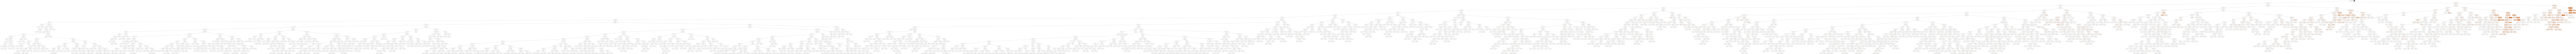

In [95]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [96]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [97]:
r2_score(y_train, y_train_pred)

0.9419870946553761

In [98]:
r2_score(y_test, y_test_pred)

0.6145729820634236

In [99]:
rf.feature_importances_

array([1.23516743e-01, 3.69772058e-02, 9.92067481e-03, 6.08039900e-02,
       7.40413346e-02, 3.25503314e-02, 1.03634173e-01, 4.39655714e-02,
       3.32699586e-02, 4.90142585e-02, 5.60589662e-02, 3.78484733e-02,
       2.13741946e-02, 2.08049192e-02, 1.35397541e-02, 8.33385014e-03,
       1.91949321e-03, 2.05317227e-04, 6.43768359e-03, 1.47633223e-03,
       1.52038249e-04, 3.03492841e-04, 1.55514678e-04, 5.13324696e-03,
       7.77667249e-06, 1.74669698e-04, 9.21182749e-05, 2.10256315e-03,
       1.60217392e-04, 9.55370739e-03, 6.07285687e-03, 4.38965857e-03,
       2.47442672e-03, 1.16287055e-03, 3.89046800e-03, 1.30329476e-03,
       8.59814614e-05, 7.74294297e-04, 6.53192984e-03, 5.22858130e-03,
       4.82663387e-03, 4.14450752e-04, 1.85747859e-03, 2.77122635e-08,
       1.32787101e-03, 1.09024367e-02, 1.23340394e-02, 8.03893143e-03,
       7.86883412e-04, 0.00000000e+00, 2.88420179e-04, 2.54207866e-03,
       2.87932787e-08, 8.25003559e-04, 1.48019567e-03, 2.69729970e-04,
      

In [100]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [101]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Rating,1.335926e-01
6,Dribbling / Reflexes,9.722530e-02
4,Shooting / Handling,8.959368e-02
11,Ingame_Stats,5.727985e-02
9,Popularity,5.375477e-02
...,...,...
105,Alt_Pos_3_LM,2.743253e-06
108,Alt_Pos_3_RM,8.303079e-07
52,BodyType_Text_Short & Stocky,6.244034e-08
43,BodyType_Text_Courtois,3.355232e-08


### models on the EA FC 24 dataset, with advanced hyperparametertuning

In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [109]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [110]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [113]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [114]:
# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

In [115]:
# GridSearchCV with cross-validation
%%time
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [116]:
# Best parameters and best estimator
print("Best parameters found:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best parameters found: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [117]:
# Evaluate on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 49349031986.5924


In [129]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [130]:
r2_score(y_train, y_train_pred)

0.999997984090891

In [131]:
r2_score(y_test, y_test_pred)

0.49537072930642456

In [135]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="r2")
print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))

Cross-validation scores: [0.46638702 0.53330522 0.58160184 0.73936888 0.65392732]
Mean CV score: 0.5949180547249906


#### advance hyperparameter tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [147]:
# Example of wider range of parameters for RandomizedSearchCV
param_distributions = {
    "n_estimators": np.arange(600, 1500, 200),
    "max_depth": [None] + list(np.arange(2, 10, 2)),
    "min_samples_split": np.arange(20, 50, 5),
    "min_samples_leaf": np.arange(10, 20, 2),
    "max_features": [0.2, 0.5, "sqrt", "log2"],
    "bootstrap": [True, False]
}

In [148]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [149]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=50, cv=10, scoring="r2", 
                                   n_jobs=-1, random_state=42, verbose=2)

In [150]:
%%time
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
CPU times: total: 26 s
Wall time: 39min 52s


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8],
                                        'max_features': [0.2, 0.5, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([10, 12, 14, 16, 18]),
                                        'min_samples_split': array([20, 25, 30, 35, 40, 45]),
                                        'n_estimators': array([ 600,  800, 1000, 1200, 1400])},
                   random_state=42, scoring='r2', verbose=2)

In [151]:
print("Best parameters from randomized search:", random_search.best_params_)

Best parameters from randomized search: {'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 14, 'max_features': 0.5, 'max_depth': 8, 'bootstrap': False}


In [152]:
best_rs = random_search.best_estimator_

In [153]:
# Evaluate on the test set
y_pred = best_rs.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 56414594223.78879


In [154]:
y_train_pred = best_rs.predict(X_train)
y_test_pred = best_rs.predict(X_test)

In [155]:
r2_score(y_train, y_train_pred)

0.6714953436457565

In [156]:
r2_score(y_test, y_test_pred)

0.4231202843581794

### Data segmentation

##### outlier handling

In [225]:
# Calculate Q1 and Q3
Q1 = np.percentile(df.Price, 25)
Q3 = np.percentile(df.Price, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 20 * IQR
upper_bound = Q3 + 20 * IQR

# Find outliers
#outliers = df[(df.Price < lower_bound) | (df.Price > upper_bound)]

#Q1

#Q3

#outliers.info()

filtered_data = df[(df.Price >= lower_bound) & (df.Price <= upper_bound)]

filtered_data.Price.describe()

count     8405.000000
mean      6531.148126
std      14875.060627
min        200.000000
25%        200.000000
50%        400.000000
75%       1400.000000
max      90500.000000
Name: Price, dtype: float64

##### data segmentation based on position and gender

In [226]:
##### male-female split

male_players = filtered_data[filtered_data.Gender_Male == 1]

female_players = filtered_data[filtered_data.Gender_Male == 0]

#male_players.info()

#female_players.info()

##### goalkeepers

maleGK = male_players[male_players.Main_Position_GK == 1]

#maleGK.info()

#maleGK.head()

#maleGK.Price.describe()

#maleGK.shape

#femaleGK.shape





femaleGK = female_players[female_players.Main_Position_GK == 1]

#femaleGK.info()

#femaleGK.head()

##### defenders

maleD = male_players[(male_players.Main_Position_CB == 1) 
                     | (male_players.Main_Position_LB == 1)
                     | (male_players.Main_Position_LWB == 1)
                     | (male_players.Main_Position_RB == 1)
                     | (male_players.Main_Position_RWB == 1)]

#maleD.info()

#maleD.head()

femaleD = female_players[(female_players.Main_Position_CB == 1) 
                     | (female_players.Main_Position_LB == 1)
                     | (female_players.Main_Position_LWB == 1)
                     | (female_players.Main_Position_RB == 1)
                     | (female_players.Main_Position_RWB == 1)]

#femaleD.info()

#femaleD.head()

##### midfielders

maleM = male_players[(male_players.Main_Position_CDM == 1) 
                     | (male_players.Main_Position_CM == 1)
                     | (male_players.Main_Position_LM == 1)
                     | (male_players.Main_Position_LW == 1)
                     | (male_players.Main_Position_RM == 1)
                     | (male_players.Main_Position_RW == 1) 
                     | (
                         (male_players.Main_Position_CB == 0) 
                         & (male_players.Main_Position_LB == 0)
                         & (male_players.Main_Position_LWB == 0)
                         & (male_players.Main_Position_RB == 0)
                         & (male_players.Main_Position_RWB == 0)
                         & (male_players.Main_Position_GK == 0)
                         & (male_players.Main_Position_CF == 0) 
                         & (male_players.Main_Position_ST == 0)
                         & (male_players.Main_Position_CDM == 0)
                         & (male_players.Main_Position_CM == 0)
                         & (male_players.Main_Position_LM == 0)
                         & (male_players.Main_Position_LW == 0)
                         & (male_players.Main_Position_RM == 0)
                         & (male_players.Main_Position_RW == 0)
                       )]

#maleM.info()

#maleM.head()

femaleM = female_players[(female_players.Main_Position_CDM == 1) 
                     | (female_players.Main_Position_CM == 1)
                     | (female_players.Main_Position_LM == 1)
                     | (female_players.Main_Position_LW == 1)
                     | (female_players.Main_Position_RM == 1)
                     | (female_players.Main_Position_RW == 1) 
                     | (
                         (female_players.Main_Position_CB == 0) 
                         & (female_players.Main_Position_LB == 0)
                         & (female_players.Main_Position_LWB == 0)
                         & (female_players.Main_Position_RB == 0)
                         & (female_players.Main_Position_RWB == 0)
                         & (female_players.Main_Position_GK == 0)
                         & (female_players.Main_Position_CF == 0) 
                         & (female_players.Main_Position_ST == 0)
                         & (female_players.Main_Position_CDM == 0)
                         & (female_players.Main_Position_CM == 0)
                         & (female_players.Main_Position_LM == 0)
                         & (female_players.Main_Position_LW == 0)
                         & (female_players.Main_Position_RM == 0)
                         & (female_players.Main_Position_RW == 0)
                       )]

#femaleM.info()

#femaleM.head()

##### Forwarders

maleF = male_players[(male_players.Main_Position_CF == 1) 
                     | (male_players.Main_Position_ST == 1)]

#maleF.info()

#maleF.head()

femaleF = female_players[(female_players.Main_Position_CF == 1) 
                     | (female_players.Main_Position_ST == 1)]

#femaleF.info()

##### check the numbers to make sure that there are no mising players from the segmented datasets

#all checks should be True

#len(filtered_data) == len(male_players) + len(female_players)

#len(male_players) == len(maleGK) + len(maleD) + len(maleM) + len(maleF)

#len(female_players) == len(femaleGK) + len(femaleD) + len(femaleM) + len(femaleF)

#len(maleM)







In [227]:
def randSearchCV(data):
    # 1) separate target variable
    X = data.drop(columns=["Price"])
    y = data["Price"]
    
    # 2) Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3) Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # 4) Example of wider range of parameters for RandomizedSearchCV
    param_distributions = {
        "n_estimators": np.arange(300, 1500, 100),
        "max_depth": [None] + list(np.arange(2, 10, 2)),
        "min_samples_split": np.arange(10, 50, 5),
        "min_samples_leaf": np.arange(4, 20, 2),
        "max_features": [0.2, 0.5, "sqrt", "log2"],
        "bootstrap": [True, False]
    }
    
    # 5) Define the model
    rf = RandomForestRegressor(random_state=42)
    
    # 6) RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                       n_iter=50, cv=10, scoring="r2", 
                                       n_jobs=-1, random_state=42, verbose=2)
    # 7) fit the model
    random_search.fit(X_train, y_train)
    print("Best parameters from randomized search:", random_search.best_params_)
    best_rs = random_search.best_estimator_
    
    # 8) Evaluate on the test set
    y_pred = best_rs.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae}")
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error on test set: ", mse)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    print(f"RMSE: {rmse}")
    y_train_pred = best_rs.predict(X_train)
    y_test_pred = best_rs.predict(X_test)
    print("R^2 value for the training set: ", r2_score(y_train, y_train_pred))
    print("R^2 value for the testing set: ", r2_score(y_test, y_test_pred))

In [228]:
%%time
randSearchCV(maleGK)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 800, 'min_samples_split': 45, 'min_samples_leaf': 14, 'max_features': 0.5, 'max_depth': 2, 'bootstrap': False}
Mean Absolute Percentage Error (MAPE): 154.27%
MAE: 940.4435593775329
Mean Squared Error on test set:  4902082.366443187
RMSE: 2214.0646707906226
R^2 value for the training set:  0.7699198544196182
R^2 value for the testing set:  0.7849589752467279
CPU times: total: 4.11 s
Wall time: 5min 52s


In [229]:
%%time
randSearchCV(maleD)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 149.24%
MAE: 2021.8968126554998
Mean Squared Error on test set:  26526495.87059313
RMSE: 5150.387933990325
R^2 value for the training set:  0.882271757130334
R^2 value for the testing set:  0.827933031828181
CPU times: total: 6.28 s
Wall time: 7min 43s


In [230]:
%%time
randSearchCV(maleM)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 154.73%
MAE: 4297.287409980295
Mean Squared Error on test set:  78945673.06606248
RMSE: 8885.137762919745
R^2 value for the training set:  0.8797899057820399
R^2 value for the testing set:  0.7572350967939605
CPU times: total: 5.27 s
Wall time: 6min 24s


In [231]:
%%time
randSearchCV(maleF)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 248.45%
MAE: 7044.209001848799
Mean Squared Error on test set:  120720581.68626809
RMSE: 10987.291826754585
R^2 value for the training set:  0.862003600216226
R^2 value for the testing set:  0.7594637257909922
CPU times: total: 3.38 s
Wall time: 3min 42s


##### femaleGK exmination because of unusual results

In [232]:
femaleGK.Price.describe()

count      179.000000
mean      2027.653631
std       6209.722177
min        200.000000
25%        300.000000
50%        350.000000
75%        650.000000
max      42250.000000
Name: Price, dtype: float64

In [233]:
maleGK.Price.describe()

count     1935.000000
mean      1674.056848
std       6397.595716
min        200.000000
25%        200.000000
50%        200.000000
75%        400.000000
max      88000.000000
Name: Price, dtype: float64

In [234]:
def priceDist(data):
    sns.kdeplot(data["Price"], fill=True)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Density")
    plt.show()

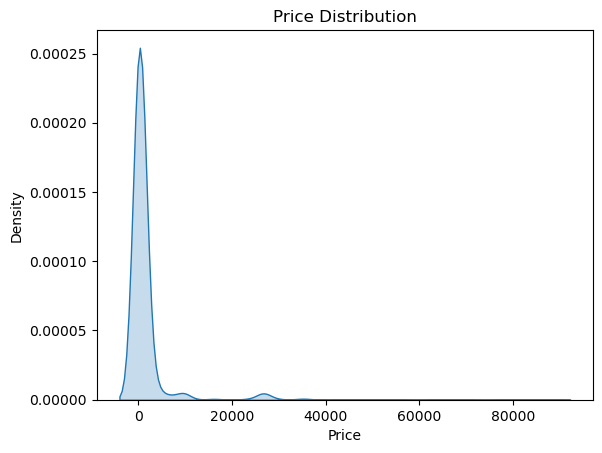

In [235]:
priceDist(maleGK)

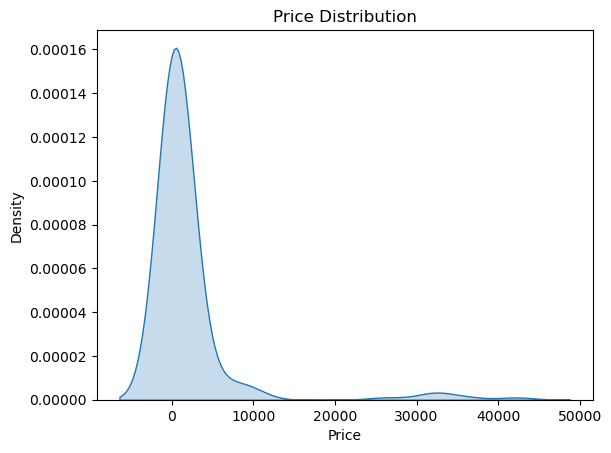

In [236]:
priceDist(femaleGK)

In [237]:
femaleGK.sort_values(by="Price", ascending=False).head(30)

,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,...,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
7834,90,42250.0,3,3,91.0,90,83,90,60,92,...,0,0,0,0,0,0,0,0,1,0
7778,92,36000.0,3,3,91.0,90,92,90,50,92,...,0,0,0,0,0,0,0,0,1,0
7801,91,32750.0,3,3,93.0,90,92,93,75,91,...,0,0,0,0,0,0,0,0,1,0
7836,90,32000.0,3,4,91.0,86,88,92,65,90,...,0,0,0,0,0,0,0,0,1,0
7797,91,32000.0,3,3,91.0,91,92,93,80,91,...,0,0,0,0,0,0,0,0,1,0
7995,85,26250.0,1,2,89.0,84,86,87,62,85,...,0,0,0,0,0,0,0,0,1,0
7866,88,10000.0,1,3,87.0,82,84,90,42,89,...,0,0,0,0,0,0,0,0,1,0
8401,78,9700.0,1,2,79.0,75,66,78,51,82,...,0,0,0,0,0,0,0,0,1,0
8979,59,9500.0,1,3,57.0,60,54,59,36,59,...,0,0,0,0,0,0,0,0,1,0
8852,69,8600.0,1,3,69.0,66,70,69,22,66,...,0,0,0,0,0,0,0,0,1,0


In [238]:
# Calculate Q1 and Q3
Q1 = np.percentile(femaleGK.Price, 25)
Q3 = np.percentile(femaleGK.Price, 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = femaleGK[(femaleGK.Price < lower_bound) | (femaleGK.Price > upper_bound)]

Q1

Q3

#outliers.info()

filtered_femaleGK = femaleGK[(femaleGK.Price >= lower_bound) & (femaleGK.Price <= upper_bound)]

filtered_femaleGK.Price.describe()

count     151.000000
mean      380.132450
std       191.753268
min       200.000000
25%       200.000000
50%       350.000000
75%       400.000000
max      1100.000000
Name: Price, dtype: float64

In [190]:
lower_bound

-225.0

In [191]:
upper_bound

1175.0

In [192]:
Q1

300.0

In [193]:
Q3

650.0

In [239]:
%%time
randSearchCV(femaleGK)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 1400, 'min_samples_split': 35, 'min_samples_leaf': 4, 'max_features': 0.2, 'max_depth': 4, 'bootstrap': False}
Mean Absolute Percentage Error (MAPE): 108.34%
MAE: 751.8822397621007
Mean Squared Error on test set:  2563288.391316169
RMSE: 1601.0272924957178
R^2 value for the training set:  0.9474068374053902
R^2 value for the testing set:  -0.1383297143043296
CPU times: total: 3.25 s
Wall time: 3min 9s


In [203]:
# let's try the filtered female GKs

In [240]:
%%time
randSearchCV(filtered_femaleGK)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 17.21%
MAE: 64.311147692976
Mean Squared Error on test set:  11637.53654913028
RMSE: 107.87741445330566
R^2 value for the training set:  0.6882918231308657
R^2 value for the testing set:  0.3933456672788609
CPU times: total: 2.5 s
Wall time: 3min 4s


In [241]:
%%time
randSearchCV(femaleD)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}
Mean Absolute Percentage Error (MAPE): 271.41%
MAE: 3598.0787151803343
Mean Squared Error on test set:  36563919.013198785
RMSE: 6046.810648035771
R^2 value for the training set:  0.7110271531134632
R^2 value for the testing set:  0.7525911423157837
CPU times: total: 2.86 s
Wall time: 3min 38s


In [242]:
%%time
randSearchCV(femaleM)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 0.5, 'max_depth': 6, 'bootstrap': False}
Mean Absolute Percentage Error (MAPE): 151.38%
MAE: 4919.339526706377
Mean Squared Error on test set:  90123817.65092626
RMSE: 9493.356500781283
R^2 value for the training set:  0.8822440208547873
R^2 value for the testing set:  0.6914687923210403
CPU times: total: 3 s
Wall time: 3min 43s


In [243]:
%%time
randSearchCV(femaleF)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 0.2, 'max_depth': 4, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 292.55%
MAE: 5573.224375229923
Mean Squared Error on test set:  44478528.18210095
RMSE: 6669.222457086054
R^2 value for the training set:  0.7382794301515798
R^2 value for the testing set:  0.8231451001361989
CPU times: total: 2.55 s
Wall time: 3min 9s


In [212]:
maleGK.shape

(1935, 114)

### Rating analysis with decision trees

In [223]:
def randSearchCV_rating(data):
    # 1) separate target variable
    #names = data.pop('Name')
    X = data.drop(columns=["Rating"])
    y = data["Rating"]
    
    # 2) Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3) Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # 4) Example of wider range of parameters for RandomizedSearchCV
    param_distributions = {
        "n_estimators": np.arange(300, 1500, 100),
        "max_depth": [None] + list(np.arange(2, 10, 2)),
        "min_samples_split": np.arange(10, 50, 5),
        "min_samples_leaf": np.arange(4, 20, 2),
        "max_features": [0.2, 0.5, "sqrt", "log2"],
        "bootstrap": [True, False]
    }
    
    # 5) Define the model
    rf = RandomForestRegressor(random_state=42)
    
    # 6) RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                       n_iter=50, cv=10, scoring="neg_mean_absolute_error", 
                                       n_jobs=-1, random_state=42, verbose=2)
    # 7) fit the model
    random_search.fit(X_train, y_train)
    print("Best parameters from randomized search:", random_search.best_params_)
    best_rs = random_search.best_estimator_
    
    # 8) Evaluate on the test set
    y_pred = best_rs.predict(X_test)
    
    # Plotting y_test and y_pred to understand the spread
    fig = plt.figure()
    plt.scatter(y_test, y_pred)
    fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
    plt.xlabel('y_test', fontsize = 18)                              # X-label
    plt.ylabel('y_pred', fontsize = 16)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error on test set: ", mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae}")
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    print(f"RMSE: {rmse}")
    y_train_pred = best_rs.predict(X_train)
    y_test_pred = best_rs.predict(X_test)
    print("R^2 value for the training set: ", r2_score(y_train, y_train_pred))
    print("R^2 value for the testing set: ", r2_score(y_test, y_test_pred))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters from randomized search: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Mean Absolute Percentage Error (MAPE): 1.11%
Mean Squared Error on test set:  1.1385432263895914
MAE: 0.7963319028831499
MSE: 1.1385432263895914
RMSE: 1.0670254103767123
R^2 value for the training set:  0.9959050603655778
R^2 value for the testing set:  0.9906406710735199
CPU times: total: 9.25 s
Wall time: 20min 7s


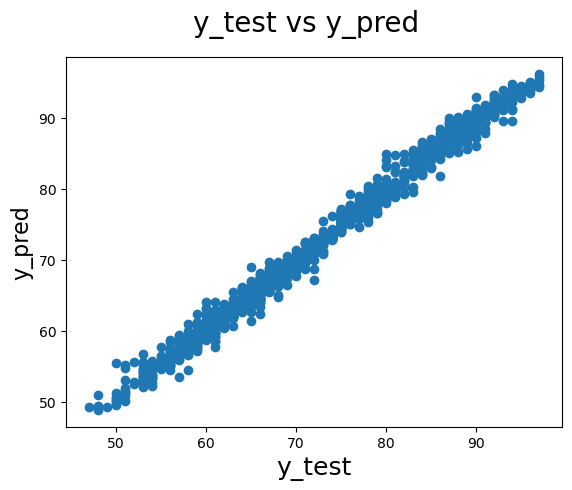

In [224]:
%%time
randSearchCV_rating(df)